<a href="https://colab.research.google.com/github/AlfredoJc-cyber/PrimeraEntrega_DataScienceI/blob/main/Copia_de_ProyectoDSFinal%2BJasaui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------------------
***PROYECTO FINAL:*** **ANÁLISIS DEL DATASET "ENHANCED ANXIETY"**

--------------------------------------------------------------------------------

***Estudiante:***  ALFREDO JASAUI CHERO

***Escuela:*** CODERHOUSE

***Curso:*** DATA SCIENCE I

***Comisión:*** 67465

***Profesor:*** JUAN CRUZ ALRIC CORTABARRIA

***Tutor:*** LUCIANO LISACHI

--------------------------------------------------------------------------------
**ABSTRACT**

--------------------------------------------------------------------------------
La ansiedad social afecta a millones de personas en el mundo y representa un desafío creciente en materia de salud mental. En un contexto donde la atención temprana y la prevención son cada vez más valoradas, contar con herramientas para identificar factores de riesgo y patrones puede aportar valor tanto para instituciones de salud como para investigadores y desarrolladores de tecnología aplicada.

La disponibilidad de data sobre ansiedad social inlcuso abre oportunidades para generar modelos descriptivos y predictivos, generando beneficios tanto sociales, desde el lado de los pacientes; como comerciales, desde el lado de los profesionales, académicos y funcionarios públicos dedicados a la salud mental.

En tal sentido, el dataset elegido para el presente análisis se denomina "Enhanced Anxiety", conformado por 19 columnas y 11,000 filas; el cual fue extraído de la plataforma Kaggle y cuya ubicación original es la siguiente:

https://www.kaggle.com/datasets/natezhang123/social-anxiety-dataset/data


Los 11,000 registros del dataset representan a personas con diferentes niveles de ansiedad social. Sin embargo, éste cuenta con una limitación que radica en que, según indicaciones de su mismo autor, no representa una muestra geográficamente segmentada.

Por otro lado, las 19 columnas contemplan variables que permiten una exploración integral desde las siguientes dimensiones:

**•	Demografía:**
1.	**Age:** Edad
2.	**Gender:** Género (masculino, femenino u otro)
3.	**Occupation:** Ocupación

**•	Estilo de vida:**
4.	**Sleep hours:** Horas de sueño diarias
5.	**Physical activity (hrs/week):** Actividad física (en horas por semana)
6.	**Caffeine intake (mg/day):** Ingesta de cafeína (en miligramos diarios)
7.	**Alcohol consumption (drinks/week):** Consumo de alcohol (en bebidas por semana)
8.	**Smoking:** Fumador (sí o no)
9.	**Diet quality (1-10):** Calidad de la dieta (del 1 al 10)
**•	Indicadores de salud física y mental:**
10.	**Stress level (1-10):** Nivel de estrés (del 1 al 10)
11.	**Heart rate (bpm):** Frecuencia cardíaca (en latidos por minuto)
12.	**Breathing rate (breaths/min):** Frecuencia respiratoria (en respiraciones por minuto)
13.	**Sweating level (1-5):** Nivel de sudoración (del 1 al 5)
14.	**Dizziness:** Sufre de mareos (sí o no)
**•	Historial de salud mental:**
15.	**Family history of anxiety:** Historial de ansiedad en la familia (sí o no)
16.	**Medication:** Uso de medicación (sí o no)
17.	**Therapy sessions (per month):** Número de sesiones de terapia (al mes)

**•	Eventos personales:**
18.	**Recent major life event:** Evento personal importante reciente (sí o no)

**•	Variable objetivo:**
19.	**Anxiety level (1-10):** Nivel de ansiedad (del 1 al 10)

--------------------------------------------------------------------------------
**PREGUNTAS DE INTERÉS**

--------------------------------------------------------------------------------
1. **¿Qué factores de estilo de vida se relacionan más con niveles altos de ansiedad?**

2. **¿El nivel de ansiedad es menor en las personas que reciben terapia en comparación con quienes no la reciben?**

3. **¿Cómo varía el nivel de ansiedad según el género y la ocupación?**

4. **¿Qué variables permiten predecir con mayor precisión el nivel de ansiedad de una persona?**

5. **¿Las personas con historial familiar de ansiedad presentan mayores niveles de ésta que quienes no lo tienen, incluso teniendo controlados los indicadores de salud física y mental?**

-------------------------------------------------------------------------------
**IMPORTACIÓN DE LIBRERÍAS**

--------------------------------------------------------------------------------

In [2]:
# Importar bibliotecas para la manipulación, análisis y visualización de datos
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar bibliotecas para funciones estadísticas, matemática avanzada, modelado y aprendizaje automático
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc
import statsmodels.api as sm

--------------------------------------------------------------------------------
**IMPORTACIÓN DEL DATASET**

--------------------------------------------------------------------------------

In [3]:
# Asegurar que se muestren las columnas completas
pd.set_option('display.max_columns', None)

# Garantizar un ancho en el espacio lo suficientemente grande para evitar saltos de línea en las columnas
pd.set_option('display.width', 1000)

# Cargar
dataset_anxiety = pd.read_csv('https://raw.githubusercontent.com/AlfredoJc-cyber/PrimeraEntrega_DataScienceI/refs/heads/main/enhanced_anxiety_dataset.csv')

# Mostrar todas las filas/registros
html_dataset = dataset_anxiety.head(20).to_html()

# Convertir los encabezados de las columnas en negrita
html_dataset = html_dataset.replace('<thead>', '<thead><b>').replace('</th>', '</b></th>')

# Mostrar resultado final
display(HTML(html_dataset))

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0
5,53,Male,Other,6.4,6.5,235,2,No,No,9,84,14,3,No,Yes,2,Yes,5,4.0
6,20,Male,Artist,7.9,2.5,78,14,Yes,No,8,118,21,5,Yes,No,1,Yes,2,4.0
7,54,Female,Lawyer,6.3,5.5,535,15,No,No,5,113,19,1,No,No,0,No,7,4.0
8,51,Other,Lawyer,6.6,3.1,587,2,No,No,2,81,22,1,Yes,No,2,Yes,8,3.0
9,59,Female,Teacher,5.1,4.8,159,15,Yes,No,5,95,28,5,Yes,Yes,1,Yes,1,4.0


--------------------------------------------------------------------------------
**IDENTIFICACIÓN DE VALORES PERDIDOS**

--------------------------------------------------------------------------------

In [4]:
# Detectar valores perdidos
missing_values = dataset_anxiety.isnull().sum()
print("Valores perdidos por columna:")
print(missing_values)

# Filtrar filas con valores perdidos
rows_with_missing_values = dataset_anxiety[dataset_anxiety.isnull().any(axis=1)]
print("\nFilas con valores perdidos:")
display(HTML(rows_with_missing_values.to_html()))

# Verificar si hay algún valor perdido en el dataset
any_missing_values = dataset_anxiety.isnull().any().any()
print("\n¿Hay valores perdidos en el dataset?", any_missing_values)

Valores perdidos por columna:
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

Filas con valores perdidos:


,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)



¿Hay valores perdidos en el dataset? False


Luego de la ejecución de los códigos, se llegó a la conclusión de que el dataset es de buena calidad al no haberse identificado valores perdidos.

---------------------------------------------------------------------------
**INFORMACIÓN GENERAL DEL DATASET**

---------------------------------------------------------------------------

Se procede a sustentar mediante codificación las características principales del dataset mencionadas en el Abstract, tales como las dimensiones y los nombres de las variables.

También procedemos a identificar a qué tipo de dato pertenece cada variable, teniendo en cuenta las siguientes referencias:

*   **Int64**: Número entero que ocupa 64 bits de memoria
*   **Float64**: Número decimal que ocupa 64 bits de memoria
*   **Object**: Cadena de texto u otro valor no numérico

In [ ]:
# Dimensiones del dataset
print("FILAS, COLUMNAS: ", dataset_anxiety.shape)

# Nombres de las variables
print("\nNOMBRES DE LAS VARIABLES \n", dataset_anxiety.columns)

# Tipo de datos de cada variable
print("\nTIPOS DE DATOS: \n", dataset_anxiety.dtypes)



FILAS, COLUMNAS:  (11000, 19)

NOMBRES DE LAS VARIABLES 
 Index(['Age', 'Gender', 'Occupation', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Smoking', 'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness', 'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event', 'Diet Quality (1-10)', 'Anxiety Level (1-10)'], dtype='object')

TIPOS DE DATOS: 
 Age                                    int64
Gender                                object
Occupation                            object
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                               object
Family History of Anxiety             object
Stress Level (1-10)                    int64
Heart Rate (bpm)                  

--------------------------------------------------------------------------------
**VARIABLES CATEGÓRICAS**

--------------------------------------------------------------------------------

***DESCRIPCIÓN***

Las variables categóricas son aquellas cuyos valores radican en nombres o grupos/categorías a los que algo pertenece, mas no en cantidades u otros valores numéricos; motivo por el cual coinciden dentro del tipo *Object* mencionado en el apartado anterior.

Entonces, las variables categóricas del dataset son las siguientes:
*   Gender
*   Occupation
*   Smoking
*   Dizziness
*  Family history of anxiety
*   Medication
*   Recent major life event

***FRECUENCIAS DE VALORES ÚNICOS***

In [ ]:
# Frecuencia de valores únicos en las variables categóricas
for col in dataset_anxiety.select_dtypes(include=['object']).columns:
    print("\nFRECUENCIA DE VALORES ÚNICOS DE", col)
    print(dataset_anxiety[col].value_counts())


FRECUENCIA DE VALORES ÚNICOS DE Gender
Gender
Female    3730
Male      3657
Other     3613
Name: count, dtype: int64

FRECUENCIA DE VALORES ÚNICOS DE Occupation
Occupation
Musician      892
Artist        888
Student       878
Nurse         861
Chef          858
Doctor        842
Other         840
Freelancer    838
Engineer      833
Scientist     832
Athlete       822
Lawyer        809
Teacher       807
Name: count, dtype: int64

FRECUENCIA DE VALORES ÚNICOS DE Smoking
Smoking
Yes    5779
No     5221
Name: count, dtype: int64

FRECUENCIA DE VALORES ÚNICOS DE Family History of Anxiety
Family History of Anxiety
Yes    5847
No     5153
Name: count, dtype: int64

FRECUENCIA DE VALORES ÚNICOS DE Dizziness
Dizziness
Yes    5672
No     5328
Name: count, dtype: int64

FRECUENCIA DE VALORES ÚNICOS DE Medication
Medication
Yes    5666
No     5334
Name: count, dtype: int64

FRECUENCIA DE VALORES ÚNICOS DE Recent Major Life Event
Recent Major Life Event
Yes    5623
No     5377
Name: count, dtype: 

***DISTRIBUCIÓN DE FRECUENCIAS***

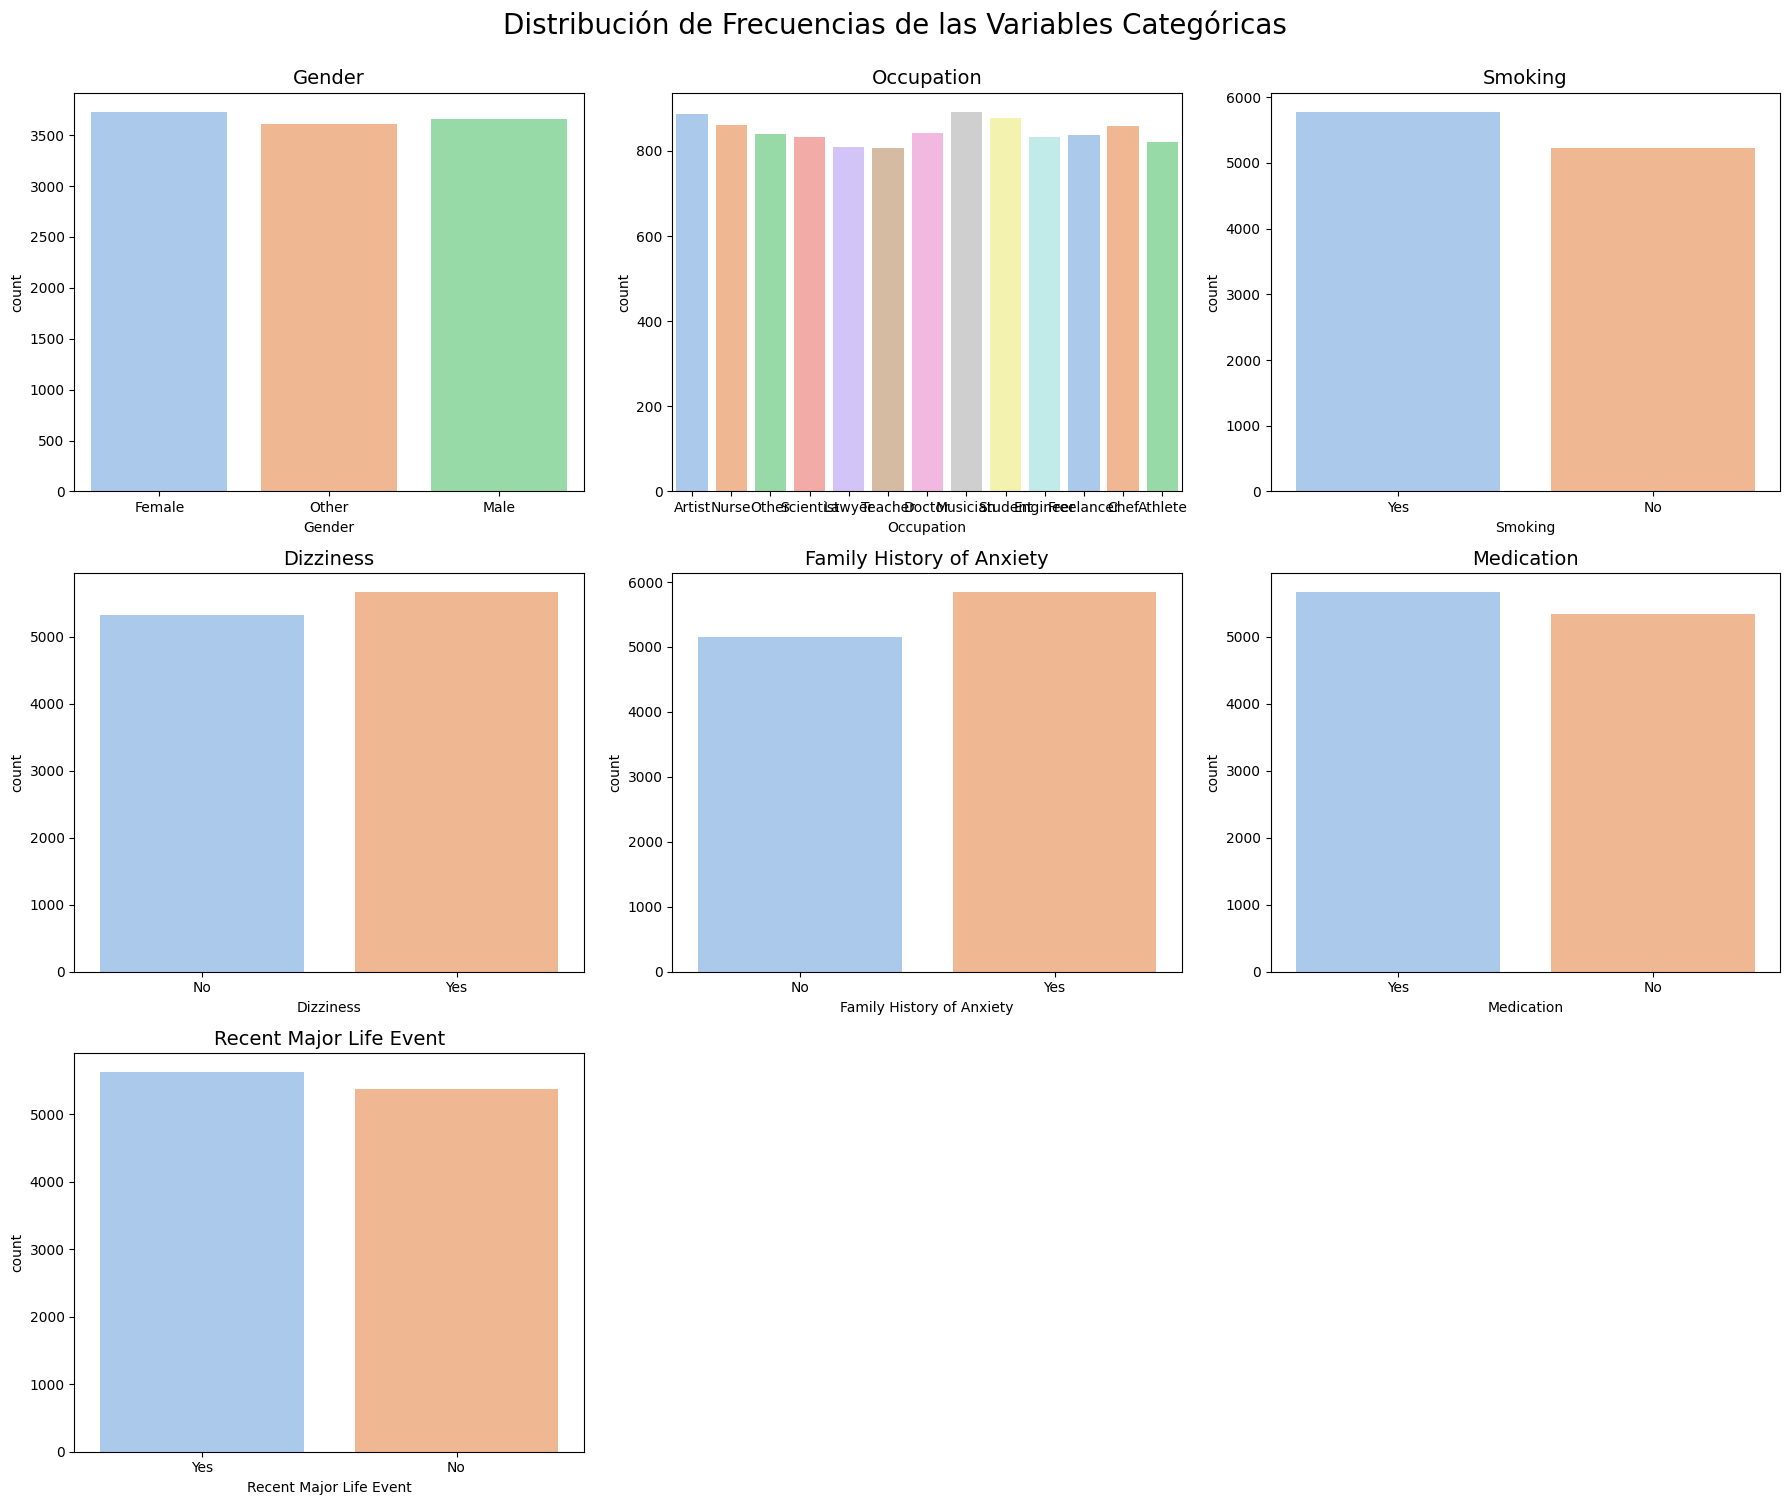

In [ ]:
# Crear la Figura en donde irán los Gráficos por cada variable (subplots), indicando el estilo y las dimensiones necesarias
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Distribución de Frecuencias de las Variables Categóricas', fontsize=20, y=1.0)

# Seleccionar las Variables Categóricas
cat_cols = ['Gender', 'Occupation', 'Smoking', 'Dizziness', 'Family History of Anxiety', 'Medication', 'Recent Major Life Event']

# Crear gráfico para cada variable (subplot)
for i, col in enumerate(cat_cols):
    row = i // 3
    col_pos = i % 3
    sns.countplot(x=col, data=dataset_anxiety, ax=axs[row][col_pos], palette='pastel', hue=col, legend=False)
    axs[row][col_pos].set_title(col, fontsize=14)

# Eliminar los subplots que se detecten vacíos
total_plots = 3 * 3
used_plots = len(cat_cols)

for j in range(used_plots, total_plots):
    row = j // 3
    col_pos = j % 3
    fig.delaxes(axs[row][col_pos])

# Mostrar la Figura
plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------
**VARIABLES NUMÉRICAS**

--------------------------------------------------------------------------------

***DESCRIPCIÓN***

Las variables numéricas son aquellas cuyos valores representan números o cantidades, y pueden ser enteros como decimales; entrando aquí los de tipo *Int64* y *Float64* detectados anteriormente.

Entonces, las variables categóricas del dataset son las siguientes:
*   Age
*   Sleep hours
*   Diet quality (1-10)
*   Stress level (1-10)
*  Physical Activity (hrs/week)
*   Caffeine Intake (mg/day)    
*   Alcohol Consumption (drinks/week)
*   Heart Rate (bpm)   
*   Breathing Rate (breaths/min)  
*   Sweating Level (1-5)  
*   Therapy Sessions (per month)  
*   Anxiety Level (1-10)

***ESTADÍSTICAS DESCRIPTIVAS***

  Donde:
*   **Count:** Conteo
*   **Mean:** Media o Promedio
*   **Std:** Desviación estándar, la cual mide la dispersión de los datos respecto a la media
*   **Min:**  Valor mínimo o menor
*   **25%:** También llamado Primer Cuartil, es el valor cuya posición se ubica al 25% de la lista de datos ordenada
*   **50%:** La Mediana, es decir, el valor cuya posición se ubica en el centro de la lista de datos ordenada
*   **75%:** También llamado Tercer Cuartil, es el valor cuya posición se ubica al 75% de la lista de datos ordenada
*   **Max:** Valor máximo o mayor

In [ ]:
# Estadísticas descriptivas de las variables numéricas, redondeadas a dos decimales
print(dataset_anxiety.describe(include=[np.number]).round(2))

            Age  Sleep Hours  Physical Activity (hrs/week)  Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  Stress Level (1-10)  Heart Rate (bpm)  Breathing Rate (breaths/min)  Sweating Level (1-5)  Therapy Sessions (per month)  Diet Quality (1-10)  Anxiety Level (1-10)
count  11000.00     11000.00                      11000.00                  11000.00                           11000.00             11000.00          11000.00                      11000.00              11000.00                      11000.00             11000.00              11000.00
mean      40.24         6.65                          2.94                    286.09                               9.70                 5.86             90.92                         20.96                  3.08                          2.43                 5.18                  3.93
std       13.24         1.23                          1.83                    144.81                               5.69                 2.93        

***DISTRIBUCIÓN DE FRECUENCIAS***

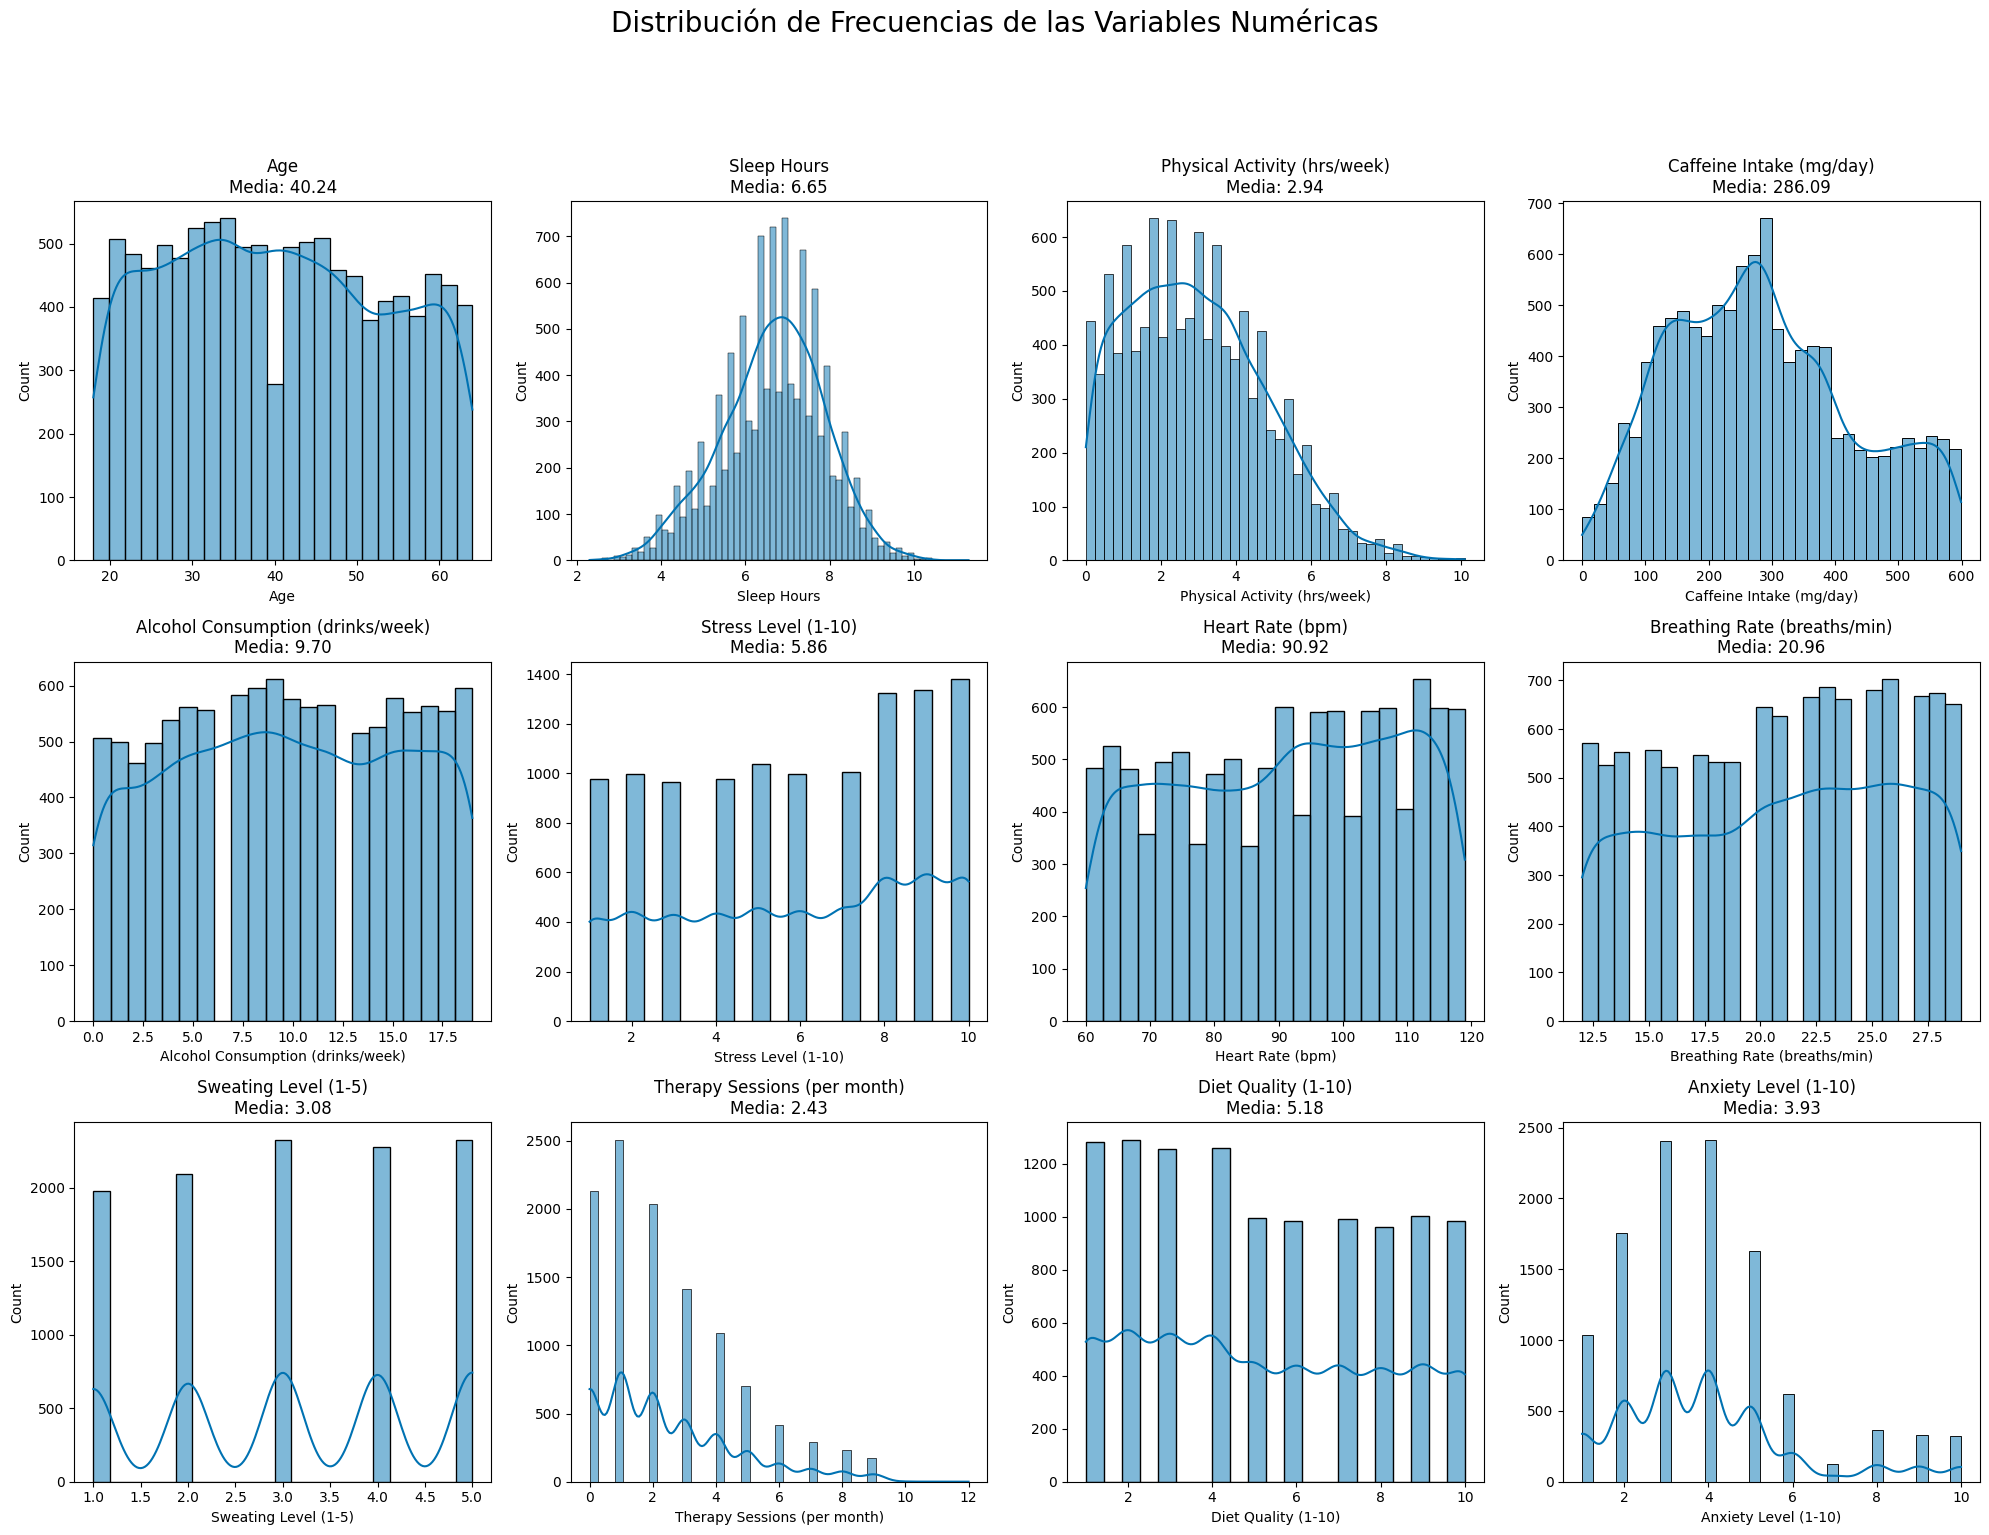

In [ ]:
# Seleccionar las Variables Numéricas
num_cols = ['Age','Sleep Hours','Physical Activity (hrs/week)',
            'Caffeine Intake (mg/day)','Alcohol Consumption (drinks/week)',
            'Stress Level (1-10)','Heart Rate (bpm)','Breathing Rate (breaths/min)',
            'Sweating Level (1-5)','Therapy Sessions (per month)',
            'Diet Quality (1-10)','Anxiety Level (1-10)']

# Crear la Figura en donde irán los Gráficos (o subplots) para cada variable, indicando el estilo y las dimensiones necesarias
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
fig.suptitle('Distribución de Frecuencias de las Variables Numéricas', fontsize=20, y=1.02)

axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=dataset_anxiety, ax=axs[i], kde=True, color='#0072B2')
    axs[i].set_title(f'{col}\nMedia: {dataset_anxiety[col].mean():.2f}', fontsize=12)

# Eliminar los subplots que se detecten vacíos
for j in range(len(num_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

--------------------------------------------------------------------------------
**DESARROLLO PARA RESPONDER A LAS PREGUNTAS DE INTERÉS**

--------------------------------------------------------------------------------
**PREGUNTA 1: ¿Qué factores de estilo de vida se relacionan más con niveles altos de ansiedad?**

***1. Desarrollo y codificación***

Se realizó un análisis multivariado para comparar las variables de la dimensión "Estilo de Vida" con la variable "Anxiety level (1-10)" mediante el coeficiente de correlación de Pearson.

Se trata de una estadística inferencial que permite medir la fuerza y dirección de una relación lineal entre dos variables, por lo que vamos a comparar cada una de dichas seis variables con la variable de nivel de ansiedad. También se debe tener en cuenta los siguientes puntos:

*   Su resultado varía entre -1 y 1
*   Si el resultado es 0, las variables no tienen correlación
*   Si el resultado es mayor a 0, existe correlación directa entre ambas variables y mientras más cercano a 1, dicha correlación es más fuerte
*   Si el resultado es menor a 0, la correlación será inversa y mientras más cercano a -1, dicha correlación será más fuerte

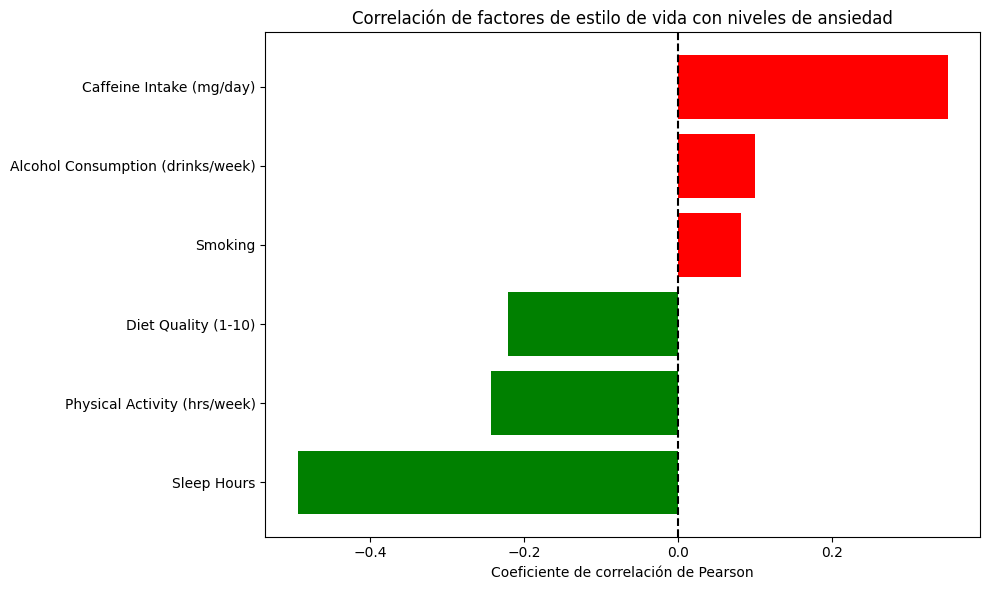

In [ ]:
# Seleccionar las variables a analizar
df = dataset_anxiety[[
    "Sleep Hours",
    "Physical Activity (hrs/week)",
    "Caffeine Intake (mg/day)",
    "Alcohol Consumption (drinks/week)",
    "Diet Quality (1-10)",
    "Smoking",
    "Anxiety Level (1-10)"
]].dropna()

# Homologar los valores de la variable "Smoking" a valores binarios y así que queden en formato numérico para el análisis
if df["Smoking"].dtype == "object":
    df["Smoking"] = df["Smoking"].map({"Yes": 1, "No": 0})

# Calcular la correlación de las seis variables de estilo de vida con la variable de nivel de ansiedad
correlations = df.corr(numeric_only=True)["Anxiety Level (1-10)"].drop("Anxiety Level (1-10)")
correlations_sorted = correlations.sort_values()

# Crear del gráfico y adecuar su estilo
colors = ['green' if val < 0 else 'red' for val in correlations_sorted]

plt.figure(figsize=(10, 6))
plt.barh(correlations_sorted.index, correlations_sorted.values, color=colors)
plt.axvline(0, color='black', linestyle='--')
plt.title("Correlación de factores de estilo de vida con niveles de ansiedad")
plt.xlabel("Coeficiente de correlación de Pearson")
plt.tight_layout()
plt.show()

***2. Interpretación de resultados***

En el gráfico de barras generado, se puede apreciar que la ingesta de cafeína, el consumo de alcohol y el ser fumador se relacionan directamente con niveles de ansiedad altos, teniendo en cuenta que las tres variables presentan valores mayores a 0 en el coeficiente de correlación.

Por otro lado; la actividad física, la calidad de la dieta y las horas de sueño tienen una relación inversa con los niveles altos de ansiedad; al arrojar valores menores a 0. Dicho de otra manera, se relacionan directamente con niveles bajos de la misma.

También se aprecia que, de las variables directamente relacionadas, la ingesta de cafeína es la más influyente al arrojar el valor de coeficiente más cercano a 1; mientras que fumar sería la menos influyente, aunque por muy poco por debajo del consumo de alcohol.

Vale destacar que, de las variables inversamente relacionadas, el sueño es la que más relación inversa mantiene al arrojar el valor más cercano a -1; mientras que la dieta sería la menos intensa, aunque por muy poco por debajo de la actividad física. Esto nos indica que el sueño es la variable más importante para evitar niveles elevados de ansiedad.

***3. Respuesta a la pregunta de interés***

 Se puede concluir que los factores de estilo de vida que se relacionan más con niveles altos de ansiedad son la ingesta de cafeína, el consumo de alcohol y el ser fumador.

--------------------------------------------------------------------------------
**PREGUNTA 2: ¿El nivel de ansiedad es menor en las personas que reciben terapia en comparación con quienes no la reciben?**

***1. Desarrollo y codificación***

Se realizó un análisis bivariado para comparar los niveles de ansiedad entre personas que sí reciben terapia y las que no. Para ello se compararon los resultados de las variables "Therapy sessions (per month)" y "Anxiety level (1-10)" mediante la prueba t de Student, otra estadística inferencial.

Para ello, se debe definir una hipótesis alterna y una hipótesis nula. La hipótesis alterna es aquella que queremos probar, es decir, que las personas que reciben terapia reducen sus niveles elevados de ansiedad. Mientras que la hipótesis nula, vendría a ser lo contrario.

Entonces, si el p-valor resulta menor a 0.05, se rechaza la hipótesis nula y nos quedamos con la alterna. El p-valor es la medida estadística que ayuda a determinar la significancia de los resultados obtenidos.

Estadístico t: 17.638766007648325
P-valor: 1.0912784963277773e-68


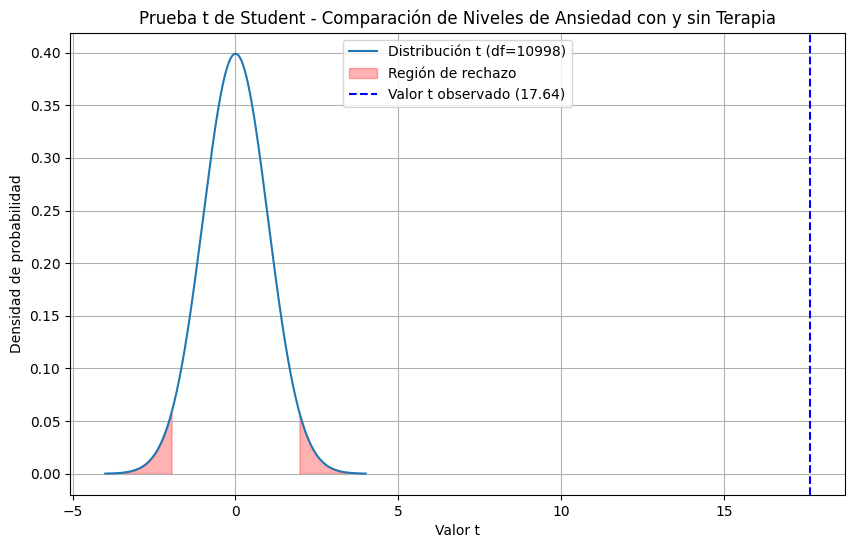

Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que la terapia reduce la ansiedad.


In [ ]:
# Dividir el dataset en dos muestras independientes según si reciben terapia o no (no terapia = 0, terapia > 0)
grupo_terapia = dataset_anxiety[dataset_anxiety['Therapy Sessions (per month)'] > 0]['Anxiety Level (1-10)']
grupo_sin_terapia = dataset_anxiety[dataset_anxiety['Therapy Sessions (per month)'] == 0]['Anxiety Level (1-10)']

# Calcular la prueba t de Student
t_stat, p_value = stats.ttest_ind(grupo_terapia, grupo_sin_terapia)

# Resultados de la prueba
print(f"Estadístico t: {t_stat}")
print(f"P-valor: {p_value}")

# Parámetros
df_total = len(grupo_terapia) + len(grupo_sin_terapia) - 2  # grados de libertad
alpha = 0.05  # nivel de significancia
t_critical = stats.t.ppf(1 - alpha/2, df_total)  # valor crítico t para dos colas

# Crear valores para graficar la distribución t
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df_total)

# Crear del gráfico y adecuar su estilo
plt.figure(figsize=(10,6))
plt.plot(x, y, label=f'Distribución t (df={df_total})')

plt.fill_between(x, 0, y, where=(x <= -t_critical), color='red', alpha=0.3, label='Región de rechazo')
plt.fill_between(x, 0, y, where=(x >= t_critical), color='red', alpha=0.3)

plt.axvline(x=t_stat, color='blue', linestyle='--', label=f'Valor t observado ({t_stat:.2f})')

plt.title('Prueba t de Student - Comparación de Niveles de Ansiedad con y sin Terapia')
plt.xlabel('Valor t')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Interpretación de resultado
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que la terapia reduce la ansiedad.")
else:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que la terapia reduce la ansiedad.")

***2. Interpretación de resultados***

En base al gráfico de distribución y resumen numérico generados, se aprecia un p-valor de 1.0912784963277773e-68, siendo así menor a 0.05 por lo que se rechaza la hipótesis nula y nos quedamos con la alterna. Por tanto, sí existe evidencia suficiente para confirmar que las personas que reciben terapia reducen sus niveles altos de ansiedad.

***3. Respuesta a la pregunta de interés***

Se puede concluir que el nivel de ansiedad sí es menor en las personas que reciben terapia en comparación con quienes no la reciben.

--------------------------------------------------------------------------------
**PREGUNTA 3: ¿Cómo varía el nivel de ansiedad según el género y la ocupación?**

***1. Desarrollo y codificación***

Se realizó un análisis multivariado aplicando estadística descriptiva calculando el promedio del nivel de ansiedad, pero en esta ocasión para cada combinación de género y ocupación, es decir, para obtener el patrón de ansiedad en las personas de cada grupo, diferenciadas por género y ocupación.

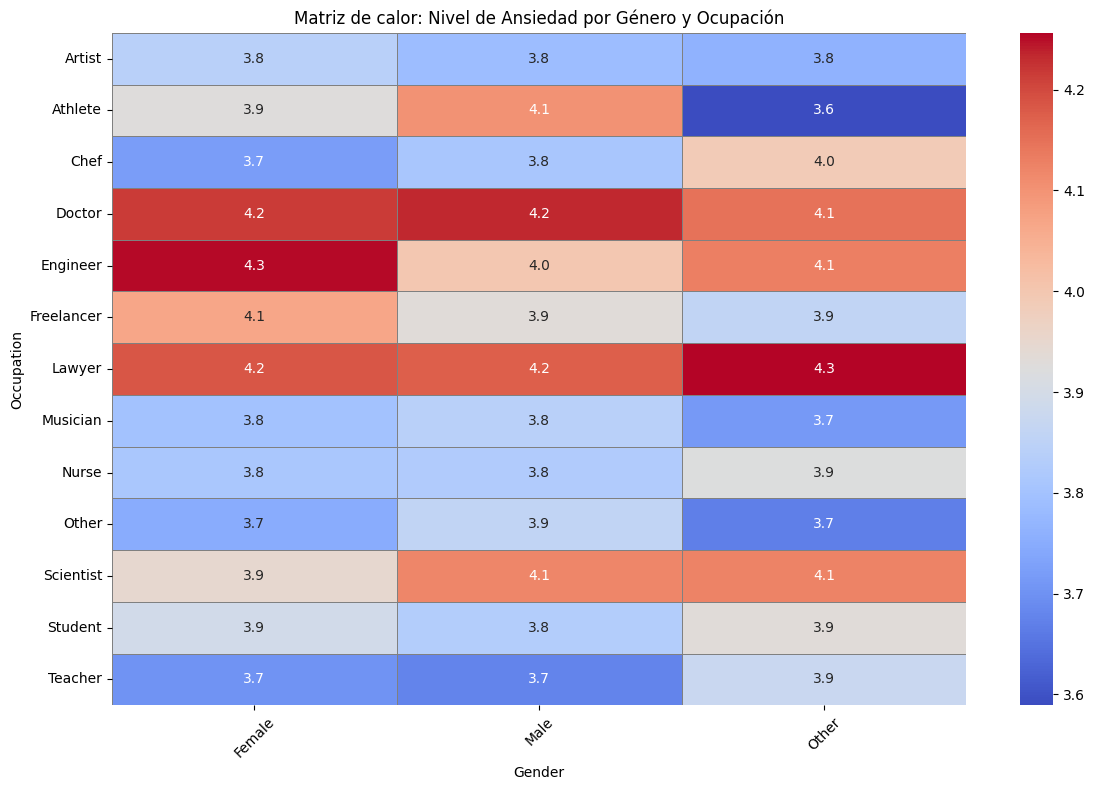

In [ ]:
# Seleccionar las columnas de análisis
df = dataset_anxiety[['Gender', 'Occupation', 'Anxiety Level (1-10)']].dropna()

# Crear una Tabla Dinámica como base para los valores que irán en la Matriz de Calor
pivot_table = df.pivot_table(values='Anxiety Level (1-10)', index='Occupation', columns='Gender', aggfunc='mean')

# Crear Matriz de Calor y su estilo
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5, linecolor='gray')

plt.title('Matriz de calor: Nivel de Ansiedad por Género y Ocupación')
plt.xlabel('Gender')
plt.ylabel('Occupation')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

***2. Interpretación de resultados***

En la Matriz de Calor generada, se aprecia que de la combinación realizada, el promedio de nivel de ansiedad mayor es de 4.3 y el menor es de 3.6, ambos representados por el color rojo más intenso y el color azul más intenso respectivamente, según lo indicado en la leyenda presentada al lado derecho.

El mayor valor (4.3) lo abordan ingenieros de género femenino y abogados de género "Other", es decir, que no se declararon ni masculinos ni femeninos. Con ello se evidencian estos perfiles como los más expuestas a elevados niveles de ansiedad. Mientras que, el menor valor (3.6) lo representan atletas de género "Other", demostrando que son personas que enfrentan los menores niveles de ansiedad.

Otro hallazgo importante radica en que los doctores, ingenieros, abogados y científicos experimentan los mayores niveles de ansiedad al estar en su gran mayoría pasando la valla del color rojo. Mientras que los artistas, músicos, profesores y otras ocupaciones declaron los menores niveles de ansiedad al estar en su gran mayoría pasando la valla del color azul.

Sin embargo, el hecho de que los promedios de nivel de ansiedad oscilen entre 3.6 y 4.2, teniendo en cuenta una escala del 1 al 10, demuestra que los valores son bastante cercanos entre sí, y por tanto, no existen grandes diferencias en el nivel de ansiedad promedio entre las distintas combinaciones de género y ocupación. Entonces, los participantes conservan niveles de ansiedad moderadamente bajos al estar los promedios calculados por debajo de la mitad de la escala, que en este caso sería 5 (al ser del 1 al 10).

***3. Respuesta a la pregunta de interés***

Se puede concluir que la variación del nivel de ansiedad según el género y la ocupación es moderadamente baja. Pero a pesar de ello, existen hallazgos interesantes entre las ocupaciones que ejercen, siendo las personas más dedicadas a las ciencias más expuestas a la ansiedad que las personas más inclinadas a profesiones artísticas.

--------------------------------------------------------------------------------
**PREGUNTA 4: ¿Qué variables permiten predecir con mayor precisión el nivel de ansiedad de una persona?**

***1. Desarrollo y codificación***

Se realizó un análisis multivariado y predictivo para descifrar la importancia de todas las variables (independientes) al momento de pronosticar el nivel de ansiedad (variable dependiente). Ésto utilizando el modelo Random Forest (o Bosque Aleatorio), un algoritmo de aperendizaje automático (o Machine Learning).

Dicho modelo nos arrojará un índice de importancia para cada variable en la predicción de la ansiedad, y también un coeficiente de determinación (R²) que mide qué tan bien el modelo puede explicar la variabilidad de la variable dependiente a partir de las independientes.

Coeficiente de determinación (R²) del modelo Random Forest: 0.770


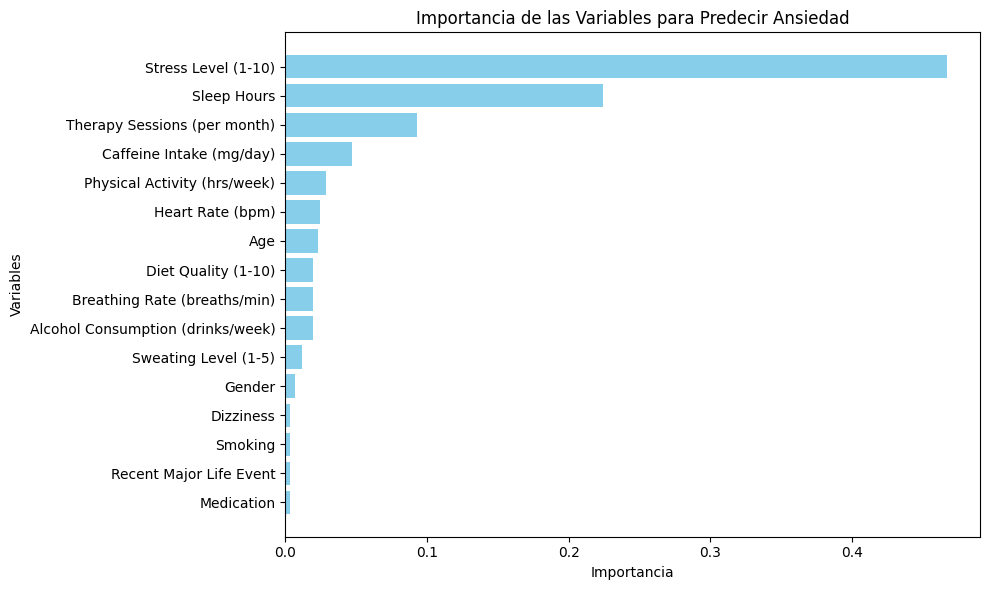

In [ ]:
# Añadir a la lista aquellas variables que no se utilizaron anteriormente
variables = [
    "Sleep Hours",
    "Physical Activity (hrs/week)",
    "Caffeine Intake (mg/day)",
    "Alcohol Consumption (drinks/week)",
    "Diet Quality (1-10)",
    "Smoking",
    "Stress Level (1-10)",
    "Heart Rate (bpm)",
    "Breathing Rate (breaths/min)",
    "Sweating Level (1-5)",
    "Therapy Sessions (per month)",
    "Dizziness",
    "Medication",
    "Recent Major Life Event",
    "Gender",
    "Age"
]

# Cargar el dataset y seleccionar las nuevas variables
df = dataset_anxiety[variables + ["Anxiety Level (1-10)"]].dropna()

# Convertir las variables categóricas a valores numéricos (por ejemplo, "Yes" -> 1 y "No" -> 0)
categorical_columns = ["Smoking", "Dizziness", "Medication", "Recent Major Life Event", "Gender"]

for column in categorical_columns:
    if df[column].dtype == "object":  # Verificar si la columna es categórica
        df[column] = df[column].map({"Yes": 1, "No": 0, "Male": 1, "Female": 0})  # Mapeo de "Yes" y "No" a 1 y 0, y Género también

# Separar variables independientes y dependientes
X = df[variables]
y = df["Anxiety Level (1-10)"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicción
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²) del modelo Random Forest: {r2:.3f}")

# Graficar la importancia de las variables
importances = rf_model.feature_importances_
indices = importances.argsort()

plt.figure(figsize=(10,6))
plt.title('Importancia de las Variables para Predecir Ansiedad')
plt.barh(range(len(variables)), importances[indices], align='center', color='skyblue')
plt.yticks(range(len(variables)), [variables[i] for i in indices])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

***2. Interpretación de resultados***

En el gráfico de barras generado bajo el modelo Random Forest, se aprecia el estrés como la variable con mayor índice de importancia, es decir, la más importante e influyente para predecir la ansiedad en una persona. Después le siguen el sueño y la terapia con moderada diferencia. Por el contrario, la medicaión, los episodios de vida recientes, el fumar, el género y la tendencia a mareos reflejan una importancia casi nula al momento de predecir la ansiedad del individuo.

Desde el resumen numérico se observa un coeficiente de determinación (R²) de 0.77, reflejando una buena calidad del modelo, teniendo presente que los fenómenos de salud mental son complejos de predecir al 100%.

***3. Respuesta a la pregunta de interés***

Se puede concluir que la variable que permite predecir con mayor precisión el nivel de ansiedad de una persona es el nivel de estrés, seguido con relativa diferencia del sueño y la terapia.

--------------------------------------------------------------------------------
**PREGUNTA 5: ¿Las personas con historial familiar de ansiedad presentan mayores niveles de ésta que quienes no lo tienen, incluso teniendo controlados los indicadores de salud física y mental?**

***1. Desarrollo y codificación***

Se realizó un análisis multivariado y predictivo aplicando el modelo de regresión lineal múltiple para pronosticar los niveles de ansiedad (variable independiente o predictora) en función de las variables dependientes, que en este caso son las variables pertenecientes a la dimensión "Indicadores de salud física y mental" y la variable "Family History of Anxiety".

Las cifras resultantes se interpretan de la siguiente manera:
*   Coeficiente: Si el valor resulta positivo, indica una relación directa entre la variable predictora y la independiente. Si resulta negativo, indica una relación inversa.
*   P-valor: Cada coeficiente tiene uno asociado, que refleja si el coeficiente es estadísticamente significativo siempre y cuando éste sea menor a 0.05.
*   Coeficiente de determinación (R²): Este valor indica qué tan bien las variables predictoras explican la variabilidad de la variable dependiente. A más cercano a 1, las variables predictoras explican gran parte de la variabilidad de la variable dependiente.

                             OLS Regression Results                             
Dep. Variable:     Anxiety Level (1-10)   R-squared:                       0.506
Model:                              OLS   Adj. R-squared:                  0.506
Method:                   Least Squares   F-statistic:                     1879.
Date:                  Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                          17:49:25   Log-Likelihood:                -20005.
No. Observations:                 11000   AIC:                         4.002e+04
Df Residuals:                     10993   BIC:                         4.007e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

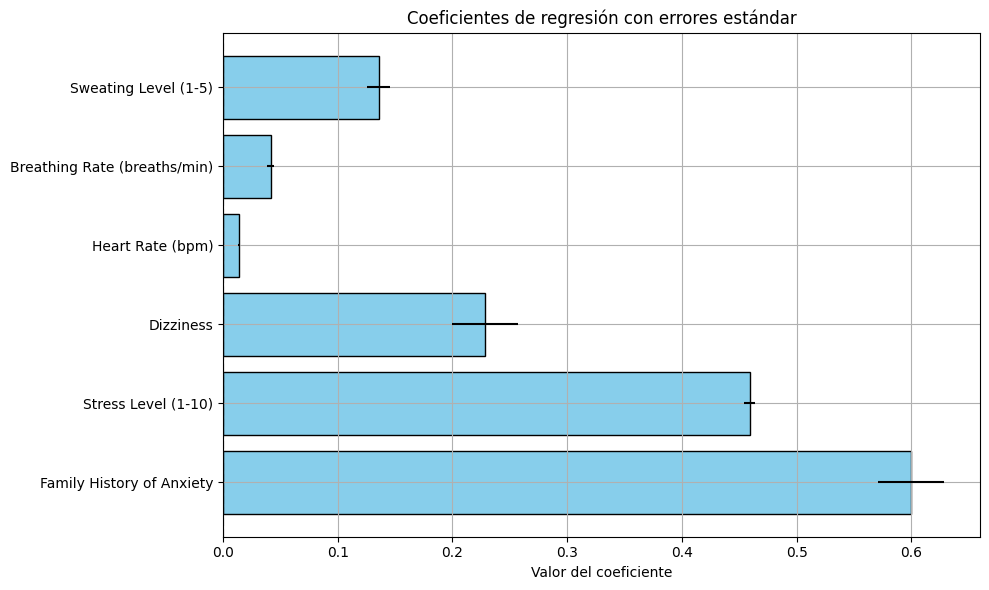

In [ ]:
# Importar librerías para modelos estadísticos avanzados
import statsmodels.api as sm

# Seleccionar variables a analizar
variables = [
    "Family History of Anxiety",
    "Stress Level (1-10)",
    "Dizziness",
    "Heart Rate (bpm)",
    "Breathing Rate (breaths/min)",
    "Sweating Level (1-5)"
]

df = dataset_anxiety[variables + ["Anxiety Level (1-10)"]].dropna()

# Convertir variables categóricas a numéricas
if df["Family History of Anxiety"].dtype == "object":
    df["Family History of Anxiety"] = df["Family History of Anxiety"].map({"Yes": 1, "No": 0})

if df["Dizziness"].dtype == "object":
    df["Dizziness"] = df["Dizziness"].map({"Yes": 1, "No": 0})

# Definir X e Y
X = df[variables]
y = df["Anxiety Level (1-10)"]

# Agregar constante para el intercepto
X = sm.add_constant(X)

# Ajustar modelo
model = sm.OLS(y, X).fit()

# Mostrar resumen
print(model.summary())

# Crear Gráfico de Coeficientes
coef = model.params.drop('const')
errors = model.bse.drop('const')

plt.figure(figsize=(10,6))
plt.barh(coef.index, coef.values, xerr=errors.values, color='skyblue', edgecolor='black')
plt.axvline(0, color='black', linestyle='--')
plt.title("Coeficientes de regresión con errores estándar")
plt.xlabel("Valor del coeficiente")
plt.grid(True)
plt.tight_layout()
plt.show()

***2. Interpretación de resultados***

En base al gráfico de coeficientes generado, se aprecia que todas los indicadores de salud física y mental se relacionan directamente con niveles de ansiedad altos.

Las variables con mayor influencia positiva en el nivel de ansiedad son los antecedentes familiares de ansiedad y el nivel de estrés. Luego le siguen los mareos y el nivel de sudoración pero en menor medida; mientras que la frecuencia cardíaca y la frecuencia respiratoria, por sí solas, no parecen ser predictores fuertes del nivel de ansiedad en este modelo.

En base al resumen numérico, se detecta un coeficiente de la variable "Family History of Anxiety" de 0.5998, indicando que en promedio, las personas con historial familiar de ansiedad tienen un nivel de ansiedad 0.5998 puntos más alto que aquellas que no lo tienen , manteniendo constantes los indicadores de salud física y mental. Por otro lado, su p-valor de 0.000 al ser menor a 0.05, indica que el efecto de tener un historial familiar de ansiedad sobre el nivel de ansiedad es estadísticamente significativo.

El hecho de que los indicadores de salud física y mental se hayan incluido en el modelo y sean significativos, quiere decir que el efecto del historial familiar de ansiedad sobre el nivel de ansiedad se ha medido mientras se controlan estos otros factores.

Por lo tanto, las personas con historial familiar de ansiedad en efecto presentan mayores niveles de ansiedad que aquellas sin este historial, incluso después de controlar los indicadores de salud física y mental. Esto se debe al coeficiente positivo de la variable "Family History of Anxiety" ya mencionado, sugiriendo que este factor tiene un impacto independiente sobre el nivel de ansiedad de las personas.


***3. Respuesta a la pregunta de interés***

Se puede concluir que el historial familiar de ansiedad es un factor importante y significativo para predecir el nivel de ansiedad, independientemente de los indicadores de salud física y mental: Estrés, mareos, ritmo cardíaco, respiración y sudoración.